## Business Context
Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset has around 49,000 observations in it with 16 columns and it is a mix of categorical and numeric values. Explore and analyse the data to discover key understandings.

# Problem Statement
Airbnb's New York City market is highly diverse, with varying preferences for room types, price ranges, and neighborhood popularity. However, it is unclear which factors significantly influence user preferences, pricing strategies, and host performance. By exploring these relationships, we aim to identify actionable insights to optimize pricing strategies, improve room type offerings, and target preferred neighborhoods effectively. Additionally, we seek to understand the impact of host activity and customer engagement metrics (e.g., number of reviews) on listing success, enabling stakeholders to make data-driven decisions to enhance customer satisfaction and maximize occupancy rates.

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading dataset
df0 = pd.read_csv('/content/drive/MyDrive/AB Projects/AirBNB Booking Analysis EDA/Airbnb NYC 2019.csv')

In [ ]:
df0.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print('shape: ',df0.shape)
df0.sample(10)

shape:  (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38989,30467289,Private South Williamsburg 1BR,20631010,Anna & Ben,Brooklyn,Williamsburg,40.70601,-73.95424,Entire home/apt,180,3,0,NaN,NaN,1,0
2726,1471244,Cozy w/amazing city views by PS1,4260529,Harry,Queens,Long Island City,40.74632,-73.94799,Private room,349,1,26,2016-12-13,0.36,2,365
42841,33263092,Beautiful 2BR in Vibrant Area!,181092484,Leonard,Manhattan,Lower East Side,40.72082,-73.98790,Entire home/apt,299,1,1,2019-05-14,0.54,3,217
13749,10343320,"UWS 1 bedroom, tree-lined street between 2 parks!",21359759,Kristen,Manhattan,Upper West Side,40.79939,-73.96875,Entire home/apt,145,1,20,2019-06-30,0.48,1,0
31349,24358122,Brooklyn apartment living room for rent,30075148,Yating,Brooklyn,Williamsburg,40.70695,-73.94524,Private room,50,7,1,2018-04-27,0.07,1,0
1249,533506,2RW - CARRIAGE HOUSE STUDIO OFF CTYD,2027013,Adam,Manhattan,East Village,40.72829,-73.98156,Entire home/apt,99,30,66,2019-07-03,0.77,6,0
9180,7024778,Charming & Modern One Bedroom in BK,238354,Israel,Brooklyn,Clinton Hill,40.68524,-73.96070,Entire home/apt,150,3,125,2019-06-25,2.60,1,271
26549,21124150,Hamilton Beach House,152366935,Victor,Queens,Howard Beach,40.65059,-73.82896,Entire home/apt,100,1,42,2019-07-01,1.97,1,220
10332,7911917,Beautiful Studio // East Village,24732939,Suraj,Manhattan,East Village,40.72578,-73.98236,Entire home/apt,140,5,16,2019-06-29,0.72,1,1
28069,21922407,Beautiful 1 bedroom in Upper west side,4389871,Agostina,Manhattan,Morningside Heights,40.80853,-73.96352,Entire home/apt,90,4,0,NaN,NaN,1,0


In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df0.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

| Field                           | Description                                      |
|-----------------------------------|--------------------------------------------------|
| Unique ID                         | Name of the listing                              |
| host_id                           | Unique host ID                                   |
| host_name                         | Name of the host                                 |
| neighbourhood_group               | Location area                                    |
| neighborhood                      | Neighborhood                                     |
| latitude                          | Latitude range                                   |
| longitude                         | Longitude range                                  |
| room_type                         | Type of listing                                  |
| price                             | Price of listing                                 |
| minimum_nights                    | Minimum nights to be paid for                   |
| number_of_reviews                 | Number of reviews                                |
| last_review                       | Content of the last review                      |
| reviews_per_month                 | Reviews per month                               |
| calculated_host_listings_count    | Total count of listings by host                 |
| availability_365                  | Availability around the year                    |


## Insights
1. This Airbnb dataset contains over 48,000 observations from New York , with 16 columns of data.

2. The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

3. This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

4. This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, we may be able to understand the trends and patterns of Airbnb use in the NYC.

In [ ]:
# handling duplicates
df0 = df0.drop_duplicates()
df0.count()

,0
id,48895
name,48879
host_id,48895
host_name,48874
neighbourhood_group,48895
neighbourhood,48895
latitude,48895
longitude,48895
room_type,48895
price,48895


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

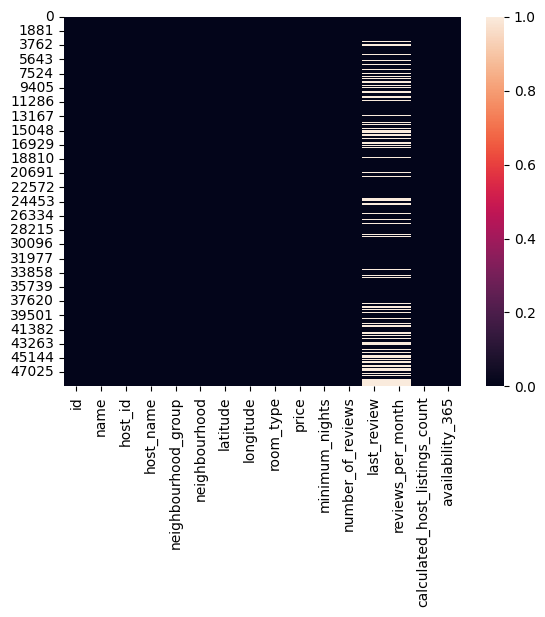

In [ ]:
# checking null values of each columns
print(df0.isnull().sum())
#Visualizing Missing Values
sns.heatmap(df0.isnull(),cbar=True)

## Insights
1. No duplicates found.
1. `name` and `host_name` have few missing value, that can be substituted.

2. `last_review` and `reviews_per_month` both have total 10052 null values, that can be substituted.

In [ ]:
# Substituting host_name and listing_name with placeholders
df0['name'].fillna('unknown',inplace=True)
df0['host_name'].fillna('no_name',inplace=True)

In [ ]:
# Fill missing 'last_review' with a placeholder and 'reviews_per_month' with 0
df0['last_review'].fillna('No Review', inplace=True)
df0['reviews_per_month'].fillna(0, inplace=True)

# Verify missing values are handled
print(df0.isnull().sum())


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


## Are private rooms preferred over other room types?
Hypothesis: Private rooms may have higher preference among customers.

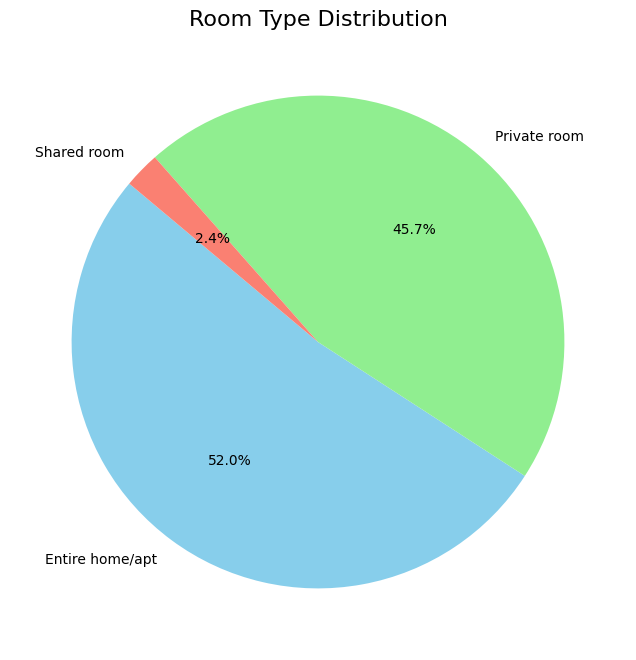

In [ ]:
# Distribution of room types
room_type_counts = df0['room_type'].value_counts()

plt.figure(figsize=(8, 8))
room_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Room Type Distribution', fontsize=16)
plt.ylabel('')  # Remove the y-axis label for clarity
plt.show()


### **Insight**


1. **Room Type Preferences:** Based on the pie chart, "Entire home/apartment" accounts for 52% of the total listings, making it the most preferred room type.
2. **Hypothesis Validation:** While private rooms are highly popular, "Entire home/apartment" remains the most preferred option. So the hypothesis is partially incorrect.

### **Suggestions**

1. **Cater to demands:** Hosts should prioritize listing entire homes/apts. And given desirability of private rooms, offer competetive pricing.

2. **Reduce Shared Room Listings:** Since shared rooms have minimal demand, hosts may consider repurposing these into private rooms.

3. **Marketing Strategies:**

*  Highlight the benefits of exclusivity for "Entire home/apartment" listings.
*  For "Private rooms," emphasize affordability and comfort, to attract younger or budget-conscious travelers.





## Is Manhattan a more popular neighborhood compared to others?
Hypothesis: Manhattan is more popular than other neighborhoods.

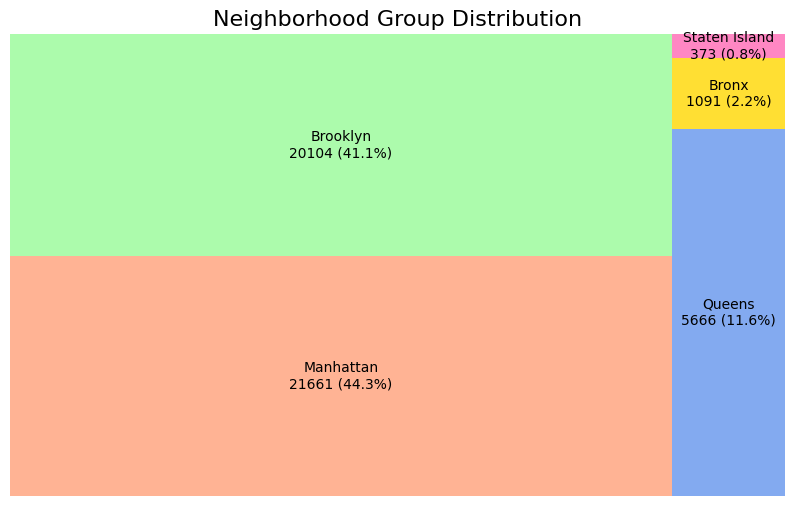

In [ ]:
!pip install squarify
import squarify
# Calculate neighborhood group counts
neighborhood_group_counts = df0['neighbourhood_group'].value_counts()
# Treemap for neighborhood groups
sizes = neighborhood_group_counts.values
labels = [f"{label}\n{size} ({size / sizes.sum() * 100:.1f}%)" for label, size in zip(neighborhood_group_counts.index, sizes)]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=['#FFA07A', '#98FB98', '#6495ED', '#FFD700', '#FF69B4'], alpha=0.8)
plt.title('Neighborhood Group Distribution', fontsize=16)
plt.axis('off')
plt.show()



### **Insights**

1. In terms of popularity, Brooklyn and Manhattan are the leaders. However our hypothesis stands correct and **Manhattan turns out to be the most popular by occupying 44.3% of market** share, while Brooklyn follows closly with 41.1%

2. **Hypothesis Validation:** Our hypothesis stands correct as Manhattan has the highest share of listings among all neighborhood groups.

### **Suggestions**

1. With its popularity, hosts should **continue to list and optimize properties in Manhattan** to cater to the high demand, and also try to **levarage Brooklyn's demands**.

2. **Marketing Strategies**

*   **Promote Queens:** Queens can be marketed as a cost-effective option for travelers who want access to both city amenities and quieter residential areas. Highlight its family-friendly environment and unique cultural experiences to attract a broader audience.
*   **Reposition Bronx and Staten Island:** Since Bronx and Staten Island have lower popularity, focus on niche marketing strategies to attract specific demographics, such as long-term stays or budget travelers.



## How are different room types distributed across the various neighborhood groups?
Hypothesis: Private rooms are most prevalent.

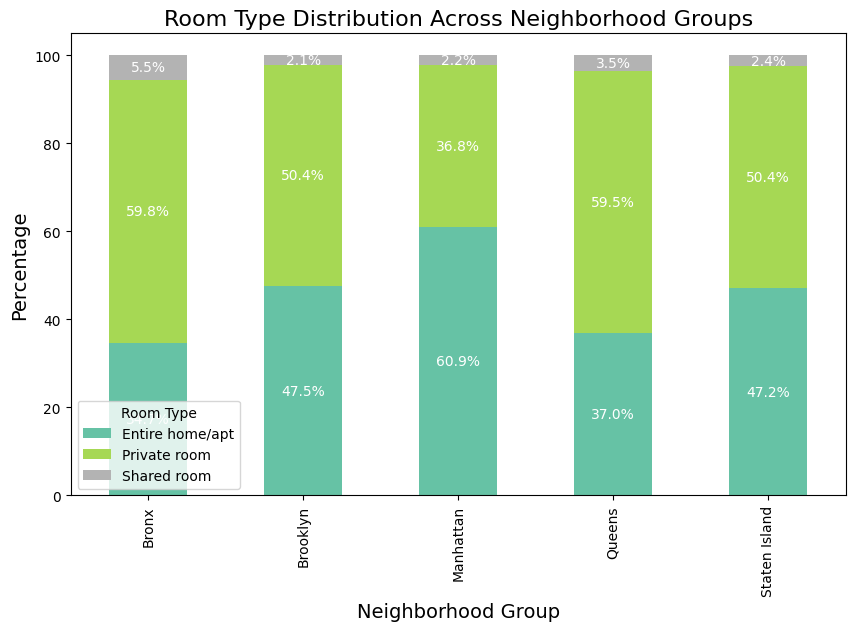

In [ ]:
# Cross-tabulation of room types and neighborhood groups
room_neighborhood = pd.crosstab(df0['neighbourhood_group'], df0['room_type'], normalize='index') * 100

# Create the stacked bar chart
ax = room_neighborhood.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

# Add quantifiable measurement labels to the stacked bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate
                bar.get_y() + height / 2,          # y-coordinate
                f'{height:.1f}%',                  # Label (percentage with one decimal)
                ha='center', va='center',         # Center align labels
                fontsize=10, color='white'        # Font styling
            )

# Add chart details
plt.title('Room Type Distribution Across Neighborhood Groups', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Room Type')
plt.show()


### **Insights**

1. With 60.9% of its listings being "Entire home/apartment," **Manhattan caters to visitors seeking luxury, privacy, and exclusivity.** Meanwhile, **private rooms** constitute the majority in Bronx (59.8%), Queens (59.5%), and Staten Island (50.4%), **appealing to budget-conscious travelers** or those who prefer shared living.

2. **Hypothesis Validation**: Manhattan strongly favors Entire home/apartment, while private rooms dominate in others. Hence our hypothesis is partially incorrect.

### **Sugesstions**
1. **Data-Driven Pricing and Marketing:** **Optimize pricing for Entire home/apartment listings in upscale areas** to maximize revenue. Whereas **implement competitive pricing for private rooms in suburban neighborhoods** to attract more guests.

2. **Marketing Strategies**

* **Customized Promotions:** Offer discounts or deals for private rooms in suburban neighborhoods to boost occupancy. And create promotional bundles for Entire home/apartment stays in Manhattan, targeting high-spending travelers.








## How do price trends vary across different room types and neighborhoods?
Hypothesis: Room prices are likely higher in Manhattan compared to other neighborhoods, and entire home/apartment listings are more expensive than private or shared rooms.

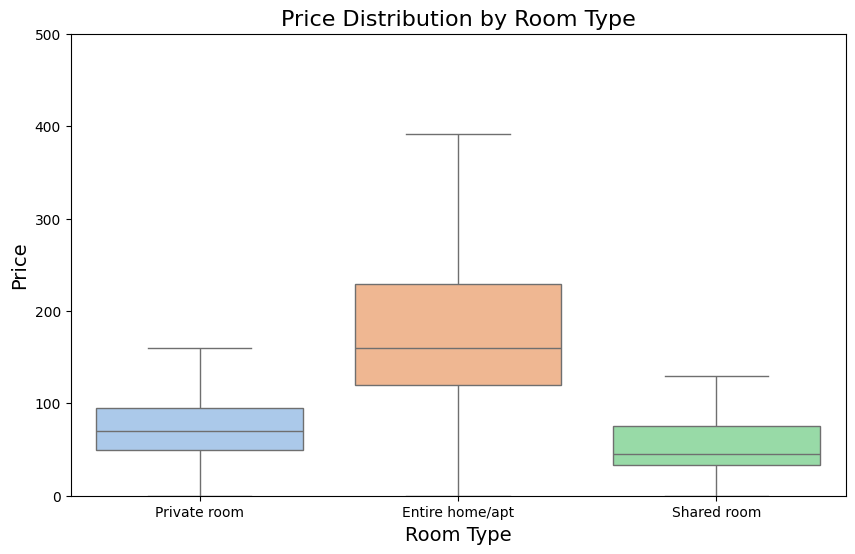

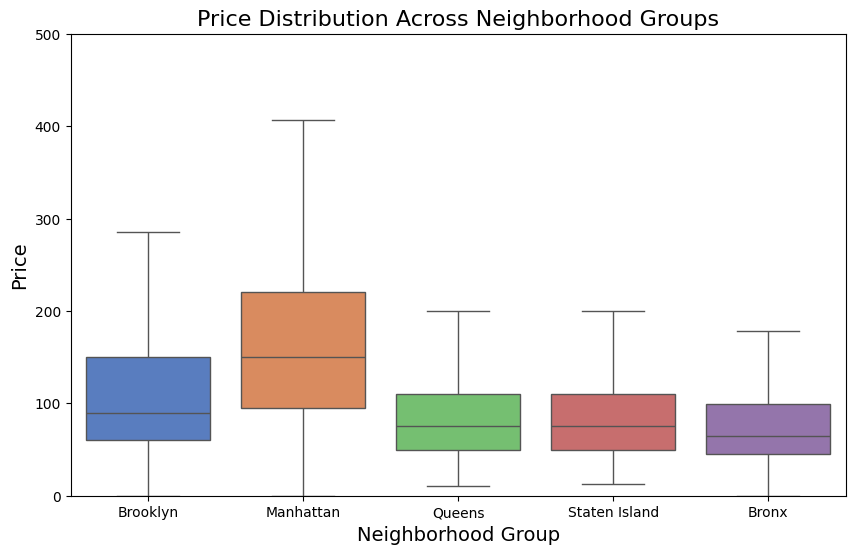

In [ ]:
# Boxplot for price by room type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df0, showfliers=False, palette='pastel')
plt.title('Price Distribution by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 500)  # Limit for better visualization
plt.show()

# Price trends across neighborhoods
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df0, showfliers=False, palette='muted')
plt.title('Price Distribution Across Neighborhood Groups', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 500)  # Limit for better visualization
plt.show()


### **Insights**

*  **Room Type Price Trends:**

1. **Entire home/apartment:** The highest median and widest price range indicate that these listings cater to premium customers willing to pay for privacy and space.

2. **Private rooms:** Moderate pricing makes private rooms a cost-effective option for travelers seeking affordability without sacrificing privacy.

3. **Shared rooms:** The lowest median price and narrow price range suggest they target budget-conscious travelers.

*  **Neighborhood Group Price Trends:**

1.   **Manhattan** has the **highest median price** compared to other neighborhoods, confirming its premium status.
The price range is broad, indicating **diverse accommodation options**, from budget-friendly to luxury.

2. **Brooklyn**’s median price is slightly lower than Manhattan but higher than the other neighborhoods, making it a **balanced option for affordability** and proximity to Manhattan.

3. **Queens, Bronx, and Staten Island:** These neighborhoods have the **lowest median prices, with Staten Island being the most affordable**.
Their narrower IQRs suggest more **consistent pricing.**

### **Suggestions**

1. **Optimize pricing for private and shared rooms in Manhattan** to attract budget-conscious travelers who still want to stay in Manhattan.

2. **Marketing Strategies**

-   Market Brooklyn as a more affordable yet convenient alternative to Manhattan.

- Advertise easy access to Manhattan from Queens and the Bronx to attract tourists on a budget.

## What are the trends in reviews per month and availability of listings across different neighborhoods and room types?
Hypothesis: Listings with higher availability are likely to receive more reviews per month, and neighborhoods with popular attractions may have higher review activity.

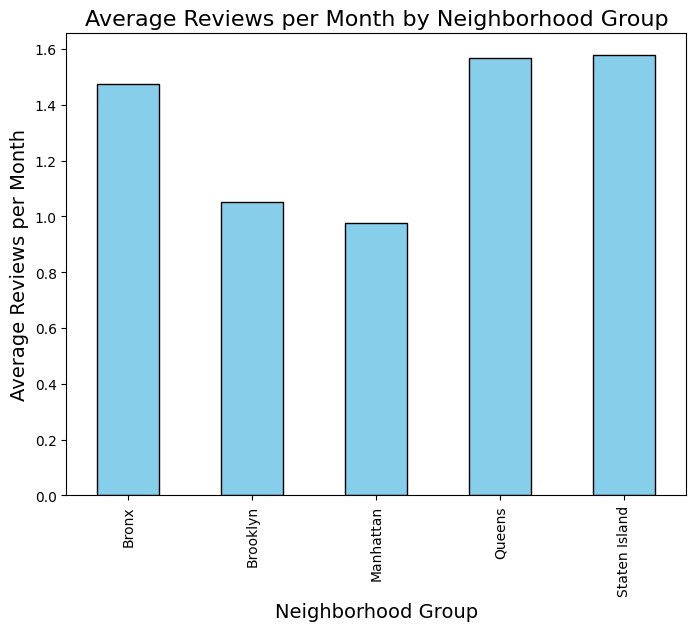

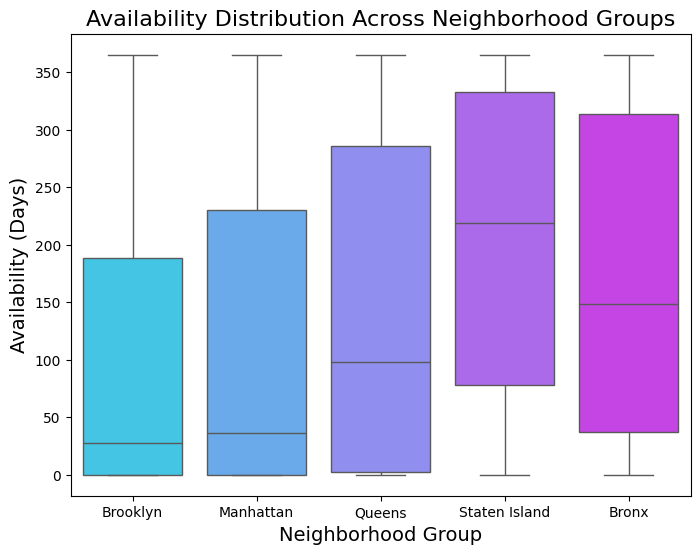

In [ ]:
# Average reviews per month by neighborhood group
avg_reviews = df0.groupby('neighbourhood_group')['reviews_per_month'].mean()

# Visualize reviews
plt.figure(figsize=(8, 6))
avg_reviews.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Reviews per Month by Neighborhood Group', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Average Reviews per Month', fontsize=14)
plt.show()

# Availability across neighborhoods
plt.figure(figsize=(8, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df0, showfliers=False, palette='cool')
plt.title('Availability Distribution Across Neighborhood Groups', fontsize=16)
plt.xlabel('Neighborhood Group', fontsize=14)
plt.ylabel('Availability (Days)', fontsize=14)
plt.show()


## What is the correlation between price and availability?
Hypothesis: Listings with higher prices may have lower availability.

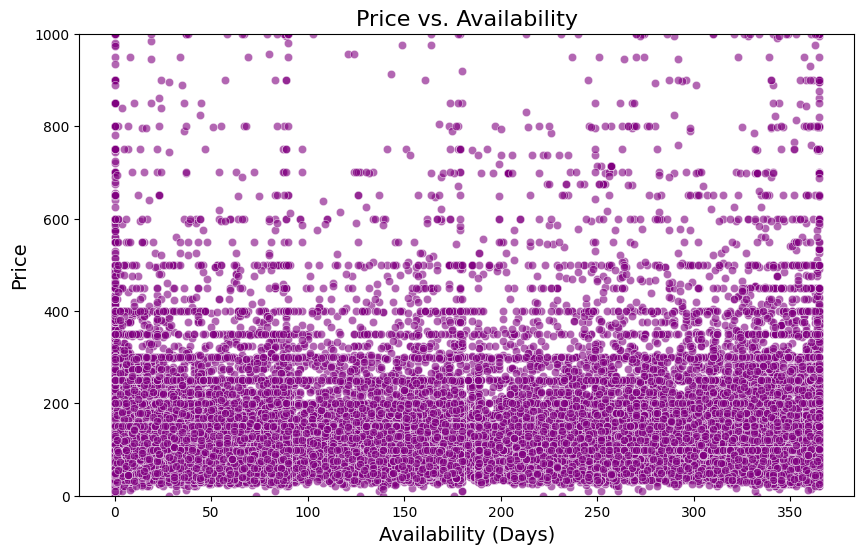

Correlation between Price and Availability:
                      price  availability_365
price             1.000000          0.081829
availability_365  0.081829          1.000000


In [ ]:
# Scatter plot for price vs availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='price', data=df0, alpha=0.6, color='purple')
plt.title('Price vs. Availability', fontsize=16)
plt.xlabel('Availability (Days)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 1000)  # Focus on relevant price range
plt.show()

# Calculate correlation
correlation = df0[['price', 'availability_365']].corr()
print("Correlation between Price and Availability:\n", correlation)


## Which neighborhoods have the highest average price?
Hypothesis: Certain neighborhoods might drive up the price in their respective groups.

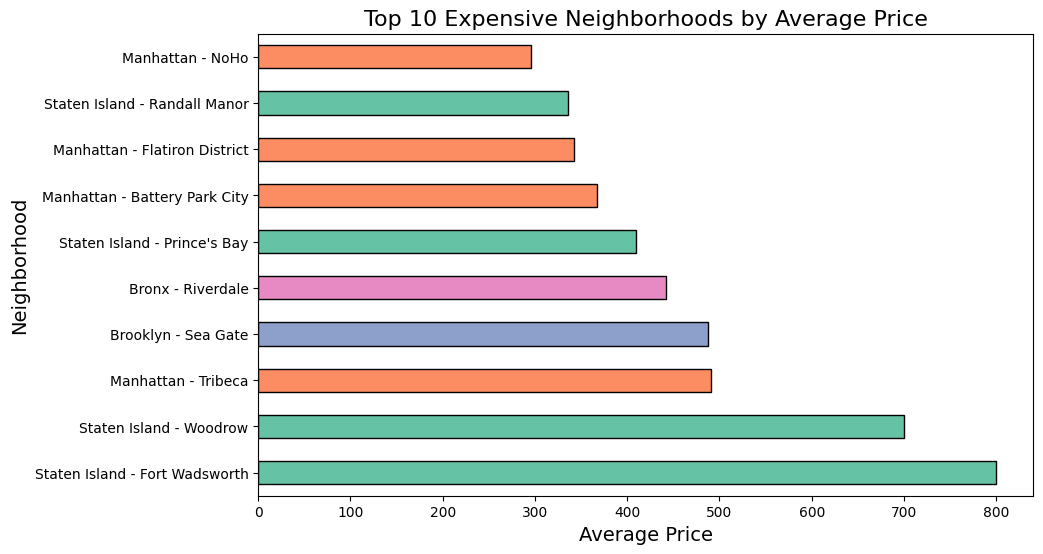

In [ ]:
# Grouping by both neighbourhood_group and neighbourhood to calculate the average price
avg_price_by_neighborhood_group = df0.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().sort_values(ascending=False).head(10)

# Create a label combining neighbourhood group and neighbourhood
avg_price_by_neighborhood_group_label = avg_price_by_neighborhood_group.index.get_level_values(0) + ' - ' + avg_price_by_neighborhood_group.index.get_level_values(1)

# Assign a unique color to each neighbourhood_group using a seaborn palette
neighborhood_groups = avg_price_by_neighborhood_group.index.get_level_values(0)
unique_groups = neighborhood_groups.unique()
color_palette = sns.color_palette("Set2", len(unique_groups))

# Create a dictionary to map each neighbourhood_group to a color
group_color_mapping = {group: color_palette[i] for i, group in enumerate(unique_groups)}

# Map colors to the bars based on their neighbourhood_group
colors = [group_color_mapping[group] for group in neighborhood_groups]

# Horizontal bar chart for top neighborhoods by price with neighborhood group visually indicated
plt.figure(figsize=(10, 6))
avg_price_by_neighborhood_group.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Top 10 Expensive Neighborhoods by Average Price', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)

# Update y-ticks with the combined labels
plt.yticks(ticks=range(len(avg_price_by_neighborhood_group)), labels=avg_price_by_neighborhood_group_label)

plt.show()


### **Insights**
1. **Fort Wadsworth has the highest average price** among neighborhoods, followed by Woodrow and Tribeca. Neighborhoods like **Sea Gate, Riverdale, and Battery Park City** are also among the most expensive, indicating a **concentration of high-priced properties in select areas**.

2. **Hypothesis Validation**: The hypothesis stands validated as certain neighborhoods are driving up the prices in their respective groups.

### **Marketing Strategy**
1. Market listings in **Fort Wadsworth and Woodrow** as ideal for high-income travelers, emphasizing unique experiences like excuisite views or cultural exclusivity.

2. For neighborhoods like **Tribeca and Flatiron District**, focus on proximity to iconic landmarks, vibrant nightlife, or historical significance in marketing materials.

## How does price vary with the number of reviews?
Hypothesis: The number of reviews for an Airbnb listing is inversely related to its price, as higher-priced listings are less frequently booked and thus accumulate fewer reviews, whereas lower-priced listings attract more guests and receive more reviews.

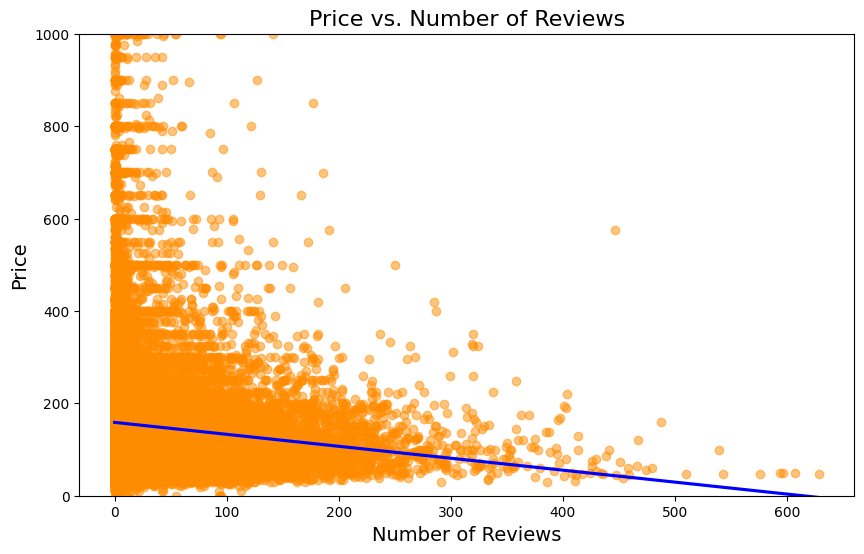

Correlation between Price and Number of Reviews:
                       price  number_of_reviews
price              1.000000          -0.047954
number_of_reviews -0.047954           1.000000


In [ ]:
# Scatter plot for price vs number of reviews
plt.figure(figsize=(10, 6))
sns.regplot(
    x='number_of_reviews',
    y='price',
    data=df0,
    scatter_kws={'alpha': 0.5, 'color': 'darkorange'},  # Customize scatter points
    line_kws={'color': 'blue'},  # Customize trend line
    ci=None  # Removes confidence interval shading
)

plt.title('Price vs. Number of Reviews', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 1000)  # Limit price range for focus
plt.show()

# Calculate correlation
correlation = df0[['price', 'number_of_reviews']].corr()
print("Correlation between Price and Number of Reviews:\n", correlation)


### **Insights**
1. The correlation between price and number of reviews is -0.048, indicating a **weak inverse relationship**, which suggests a slight tendency for listings with higher prices to have fewer reviews. **Lower-priced listings likely attract a broader customer base**, resulting in more frequent bookings and a higher number of reviews.

2. **Hypothesis Validation**: The hypothesis holds to a certain extent, as the correlation matrix shows a weak inverse relationship between price and number of reviews.

### **Suggestions**

1. Listings with higher prices should emphasize unique features, luxury amenities, and customer experiences to justify their cost and attract more bookings, which could lead to an increase in reviews.

2. **Marketing Strategy**: Listings with a high number of reviews should be highlighted as **“most popular” or “guest favorites”** to attract more customers.

## Are hosts with more listings charging higher prices?
Hypothesis: Hosts with multiple listings might offer competitive prices.

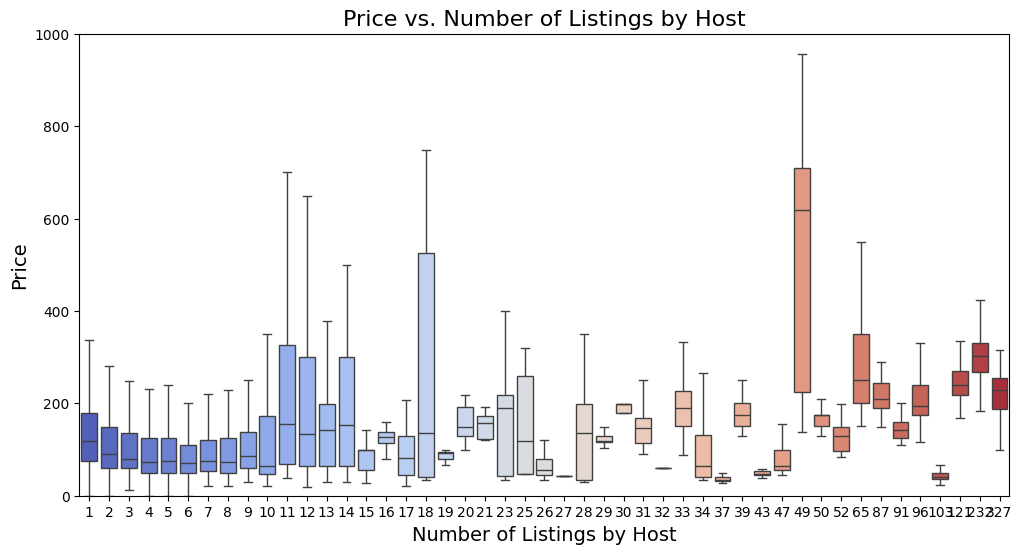

In [ ]:
# Boxplot for price vs calculated_host_listings_count
plt.figure(figsize=(12, 6))
sns.boxplot(x='calculated_host_listings_count', y='price', data=df0, showfliers=False, palette='coolwarm')
plt.title('Price vs. Number of Listings by Host', fontsize=16)
plt.xlabel('Number of Listings by Host', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0, 1000)
plt.show()


### **Insights**

Price Trends for Hosts with Multiple Listings:
Hosts with Fewer Listings:

1. Hosts with fewer listings (1-5) generally have lower and more consistent prices.
Prices tend to stabilize below $200 for most hosts with limited listings.
Hosts with Multiple Listings:

2. Hosts with more listings (greater than 10) show higher variability in prices.
There are clear outliers where prices spike significantly (e.g., 18, 49, and 50 listings), indicating premium or luxury accommodations.
Large Portfolio Hosts:

3. For hosts with extensive portfolios (e.g., 50+ listings), there is a noticeable upward trend in median prices.
This suggests that large-scale hosts likely manage more premium or entire-home listings, driving higher prices.

### **Suggestions**

1. **Optimize Prices for Limited Listings:** Smaller hosts (1–5 listings) should focus on competitive pricing to attract budget-conscious travelers.


## Conclusion
This analysis of Airbnb’s New York City market sheds light on key trends and opportunities. **Entire homes/apartments** dominate as the preferred choice, especially in premium neighborhoods like **Manhattan**, which remains the clear leader in both demand and pricing. **Brooklyn** emerges as a strong alternative, balancing affordability with proximity, while **Queens and the Bronx offer budget-friendly options.**

**Hosts with smaller portfolios** (1–5 listings) generally maintain stable, competitive pricing, while larger hosts managing luxury properties see higher price variability. Lower-priced listings attract more reviews, likely driven by higher booking frequency.

### Recommendations
- Smaller hosts should focus on affordable pricing to attract budget travelers.
- Luxury listings should highlight exclusivity and amenities to justify higher prices.
- Promote Queens and the Bronx for affordability, while positioning Manhattan and select upscale neighborhoods like Tribeca for premium travelers.

By leveraging these insights, Airbnb hosts can tailor pricing and marketing strategies to better meet guest preferences, improve visibility, and boost occupancy rates across NYC’s diverse neighborhoods.

